In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import json
import requests
import os
import matplotlib.pyplot as plt
import cufflinks as cf
cf.set_config_file(world_readable=True,theme='pearl')
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
years = [2015,2016,2017,2018,2019]
df={}

for year in years:
    url = f"../UWA-Project/Resources/{year}.csv"
    pd.set_option("display.max_rows",159)
    df[year] = pd.read_csv(url)
    


In [49]:
df_2015,df_2016,df_2017,df_2018,df_2019 = df[2015],df[2016],df[2017],df[2018],df[2019]

In [68]:
for year in years:
    print(f"""{year} \n{df[year].isna().sum()}
----------""")

2015 
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
----------
2016 
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
----------
2017 
Country                          0
Happiness.Rank          

In [73]:
df_2018.fillna(0,inplace = True)
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [75]:
for year in years:
    print(f"""{year} \n{df[year].shape}
----------""")

2015 
(158, 12)
----------
2016 
(157, 13)
----------
2017 
(155, 12)
----------
2018 
(156, 9)
----------
2019 
(156, 9)
----------


In [76]:
# get columns data
for year in years:
    print(f"""{year} \n{df[year].columns}
----------""")

2015 
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
----------
2016 
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
----------
2017 
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
----------
2018 
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
      

In [79]:
df[2015]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [77]:
df[2016].corr()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


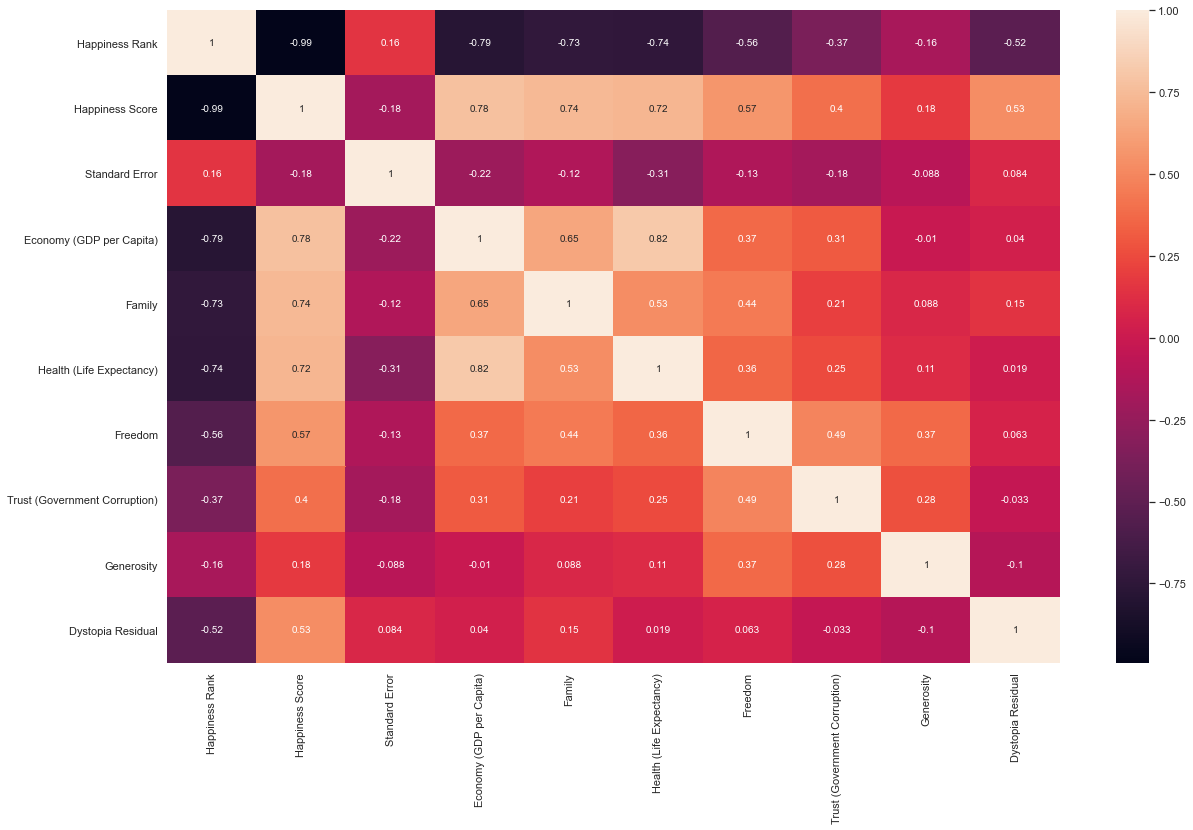

In [58]:
plt.figure(figsize=(20,12))
sns.heatmap(df[2016].corr(), annot=True)
plt.show()

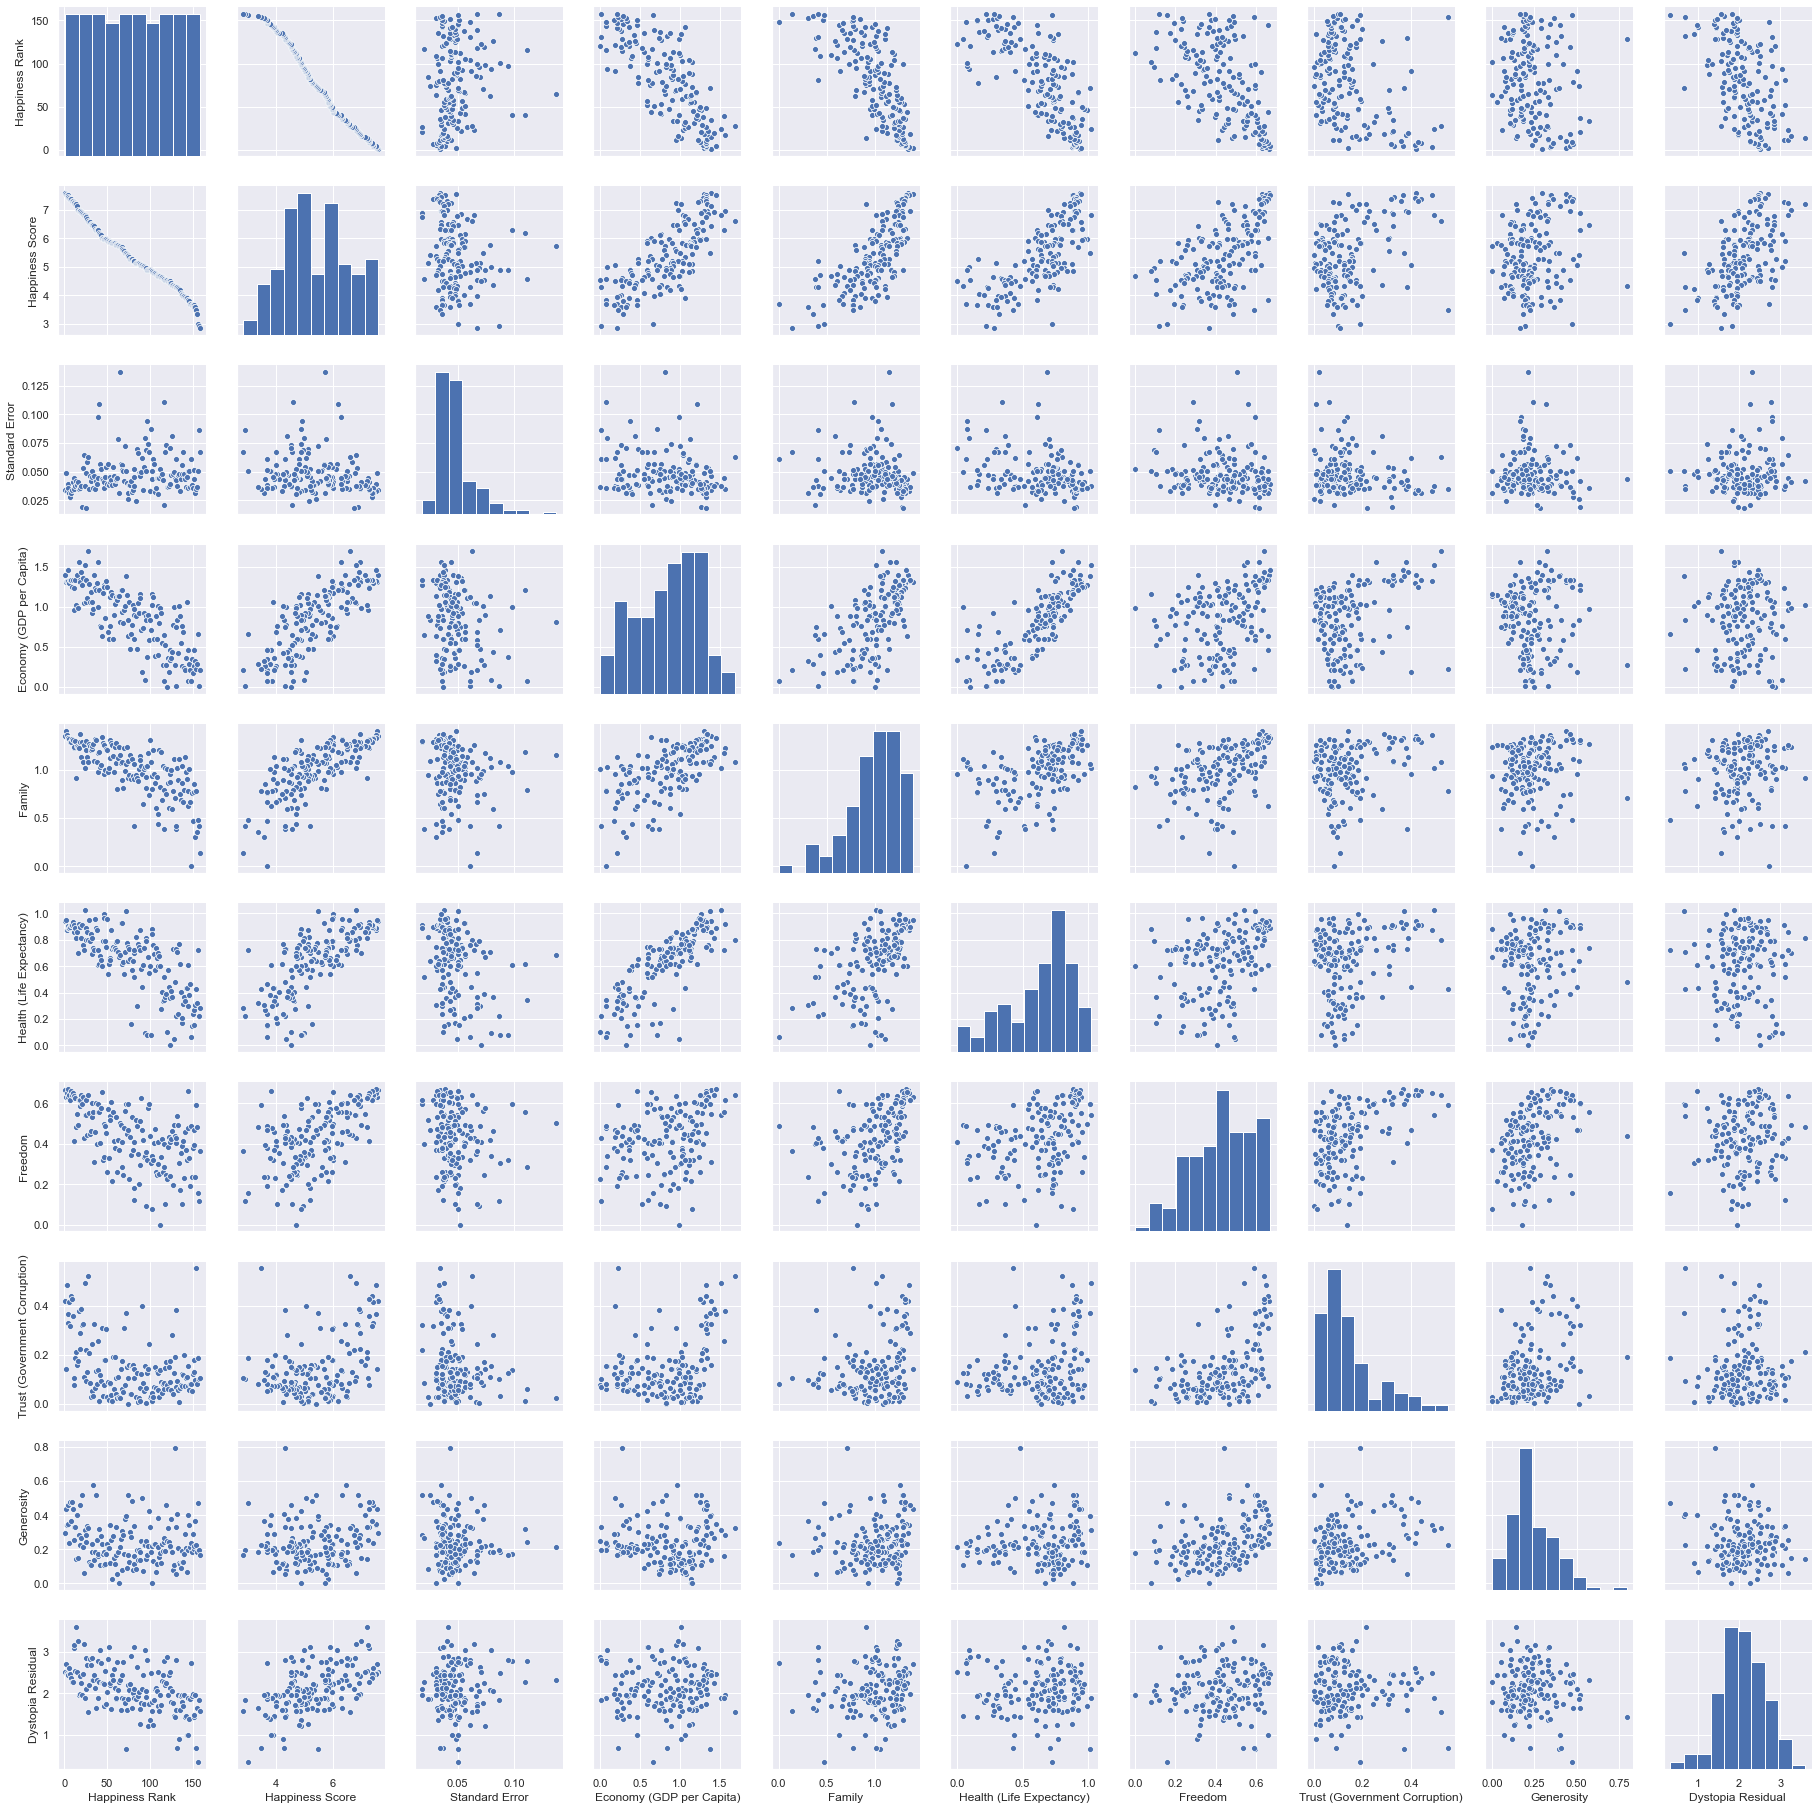

In [63]:
sns.pairplot(df[2016])

In [62]:
cf.help('bar')

BAR
Bar Chart
Supports categories and horizontal bar charts


Parameters:
    bargap : float
        Sets the gap between bars
        	[0,1)
    bargroupgap : float
        Sets the gap between groups
        	[0,1)
    barmode : string
        Bar mode
        	group
        	stack
        	overlay
    categories : string
        Name of the column that contains the categories
    orientation : string
        Sets the orientation of the bars.
        	h
        	v
    sortbars : bool
        Sort bars in descending order


    colors : dict, list or string
        Trace color
        	string : applies to all traces
        	list : applies to each trace in the order specified
        	dict : {column:value} for each column in the dataframe
        values
        	colorname : see cufflinks.colors.cnames
        	hex : '#ffffff'
        	rgb : 'rgb(23,50,23)'
        	rgba : 'rgba(23,50,23,.5)
    colorscale : string
        Color scale name
        If the color is preceded by a minus (-